# Pipeline

Experimentando classificação com `SVC` para explorar a implementação da `make_pipeline`

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

## Carregando dados

In [2]:
chb01_df = pd.read_csv('./chb11_com_dwt.csv')

y = chb01_df.pop('target').values
X = chb01_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

target_names = ['negative', 'positive']

## Teste sem normalização

Teste sem normalização
              precision    recall  f1-score   support

    negative     0.9470    1.0000    0.9728       125
    positive     1.0000    0.9391    0.9686       115

    accuracy                         0.9708       240
   macro avg     0.9735    0.9696    0.9707       240
weighted avg     0.9724    0.9708    0.9708       240



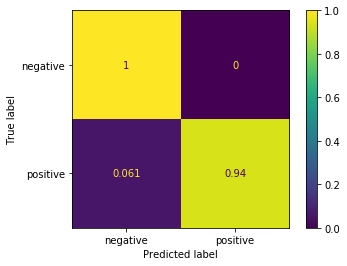

In [3]:
model_1 = SVC(random_state=0).fit(X_train, y_train)

y1_pred = model_1.predict(X_test)

print("Teste sem normalização")

plot_confusion_matrix(model_1, X_test, y_test, normalize='true', display_labels=target_names)

print(classification_report(y_test, y1_pred, target_names=target_names, digits=4))

## Teste com Normalização

Teste com normalização
              precision    recall  f1-score   support

    negative     0.9538    0.9920    0.9725       125
    positive     0.9909    0.9478    0.9689       115

    accuracy                         0.9708       240
   macro avg     0.9724    0.9699    0.9707       240
weighted avg     0.9716    0.9708    0.9708       240



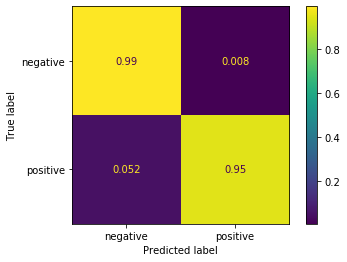

In [4]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_2 = SVC(random_state=0).fit(X_train_scaled, y_train)

y2_pred = model_2.predict(X_test_scaled)

print("Teste com normalização")

plot_confusion_matrix(model_2, X_test_scaled, y_test, normalize='true', display_labels=target_names)

print(classification_report(y_test, y2_pred, target_names=target_names, digits=4))

## Teste com Pipeline

Teste com Pipeline
              precision    recall  f1-score   support

    negative     0.9538    0.9920    0.9725       125
    positive     0.9909    0.9478    0.9689       115

    accuracy                         0.9708       240
   macro avg     0.9724    0.9699    0.9707       240
weighted avg     0.9716    0.9708    0.9708       240



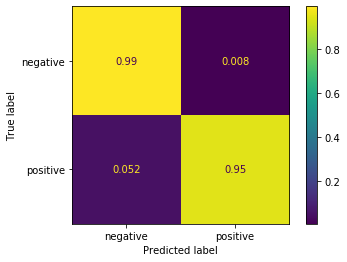

In [5]:
model_3 = make_pipeline(StandardScaler(), SVC(random_state=0)).fit(X_train, y_train)

y3_pred = model_3.predict(X_test)

print("Teste com Pipeline")

plot_confusion_matrix(model_3, X_test, y_test, normalize='true', display_labels=target_names)

print(classification_report(y_test, y3_pred, target_names=target_names, digits=4))